In [1]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:

df = pd.read_csv('chart.csv')

df['minute'] = (df['time_in_seconds'] // 60).astype(int)

message_count_per_minute = df.groupby('minute')\
    .size()\
    .reset_index(name='message_count')

message_count_per_minute.head()

,minute,message_count
0,0,137
1,1,160
2,2,99
3,3,113
4,4,345


In [3]:
time_labels = pd.to_datetime(message_count_per_minute['minute'], unit='m').dt.strftime('%H:%M')

time_labels_10min = time_labels[::10]
minutes_10min = message_count_per_minute['minute'][::10]
display(minutes_10min.head())
time_labels_10min.head()

0      0
10    10
20    20
30    30
40    40
Name: minute, dtype: int64

0     00:00
10    00:10
20    00:20
30    00:30
40    00:40
Name: minute, dtype: object

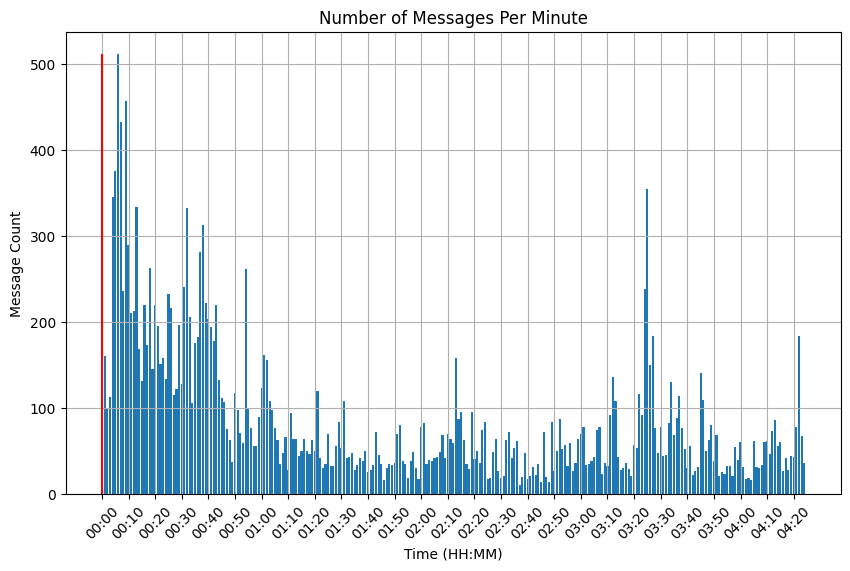

In [4]:
plt.figure(figsize=(10, 6))
plt.bar(message_count_per_minute['minute'], message_count_per_minute['message_count'])

plt.xticks(ticks=minutes_10min, labels=time_labels_10min, rotation=45)
plt.vlines(0, ymin=0, ymax=message_count_per_minute['message_count'].max(), colors='red')

# Adding labels and title
plt.xlabel('Time (HH:MM)')
plt.ylabel('Message Count')
plt.title('Number of Messages Per Minute')

plt.grid(True)
plt.show()